In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as ndi
from skimage import feature
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage.exposure import equalize_hist
from skimage.exposure import equalize_adapthist
from skimage.exposure import rescale_intensity
from skimage.feature import canny
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops
import pandas as pd

In [7]:
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [9]:
import irtemp

In [10]:
frames = io.imread('../doc/6_11_19_Proline_MA_flat_plate.tiff')

In [68]:
len(frames)

5746

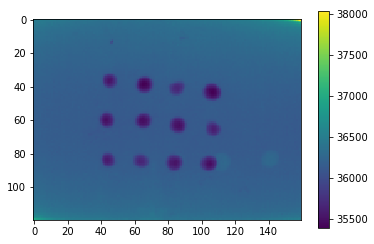

In [105]:
plt.imshow(frames[2000])
plt.colorbar()

In [5]:
frames[0]

array([[30818, 30829, 30810, ..., 32345, 32535, 32719],
       [30814, 30822, 30808, ..., 31688, 31774, 31900],
       [30789, 30801, 30797, ..., 31341, 31381, 31430],
       ...,
       [30841, 30822, 30805, ..., 30637, 30631, 30614],
       [30992, 30947, 30920, ..., 30674, 30678, 30660],
       [31255, 31186, 31119, ..., 30710, 30697, 30716]], dtype=uint16)

In [141]:
edges=[]
for i in range(len(frames)):
    edges.append(feature.canny(frames[0]/4000))

In [142]:
from skimage.morphology import remove_small_objects
labeled_wells = []
for i in range(len(edges)):
    filled_wells = binary_fill_holes(edges[i])
    cl_wells = remove_small_objects(filled_wells,min_size=25)
    labeled_wells.append(label(cl_wells))

In [143]:
len(labeled_wells)


5746

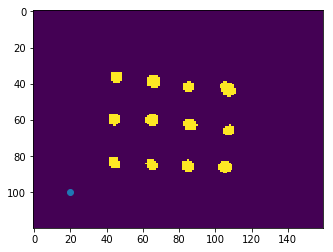

In [147]:
plt.imshow(cl_wells)
plt.scatter(20,100)

In [170]:
regprops = {}
for i in range(len(labeled_wells)): 
    props = regionprops(labeled_wells[i], intensity_image=frames[i])
    x = np.zeros(len(props))
    y = np.zeros(len(props))
    area = np.zeros(len(props))
    perim = np.zeros(len(props))
    intensity = np.zeros(len(props))

    counter = 0
    for prop in props:
        x[counter] = prop.centroid[0]
        y[counter] = prop.centroid[1]
        area[counter] = prop.area
        perim[counter] = prop.perimeter
        intensity[counter] = prop.mean_intensity

        counter += 1

    regprops[i] = pd.DataFrame({'X': y, 'Y': x, 'Area': area,
                            'Perim': perim, 'Mean Intensity': intensity})

In [171]:
regprops[1]

,X,Y,Area,Perim,Mean Intensity
0,45.500000,36.352941,34.0,18.828427,30217.882353
1,66.045455,38.931818,44.0,21.656854,30129.204545
2,85.500000,41.666667,30.0,17.656854,30286.366667
3,107.090909,42.963636,55.0,26.142136,30193.618182
4,44.361111,59.694444,36.0,19.656854,30175.750000
5,65.243902,60.000000,41.0,20.485281,30173.756098
6,86.256410,62.538462,39.0,21.071068,30157.153846
7,107.607143,65.821429,28.0,17.071068,30208.821429
8,44.424242,83.545455,33.0,18.828427,30191.181818
9,65.187500,84.531250,32.0,18.485281,30242.281250


In [125]:
temp = []
for j in range(12):
    temp_well = []
    for i in range(len(frames)):
        temp_well.append(regprops[i]['Mean Intensity'][j])
    temp.append(temp_well)   

In [127]:
len(temp[0])

5746

## Temperature of the plate

In [152]:
plate_temp = []
for i in range(len(frames)):
    plate_temp.append(frames[i][20][100])
    

In [153]:
len(plate_temp)

5746

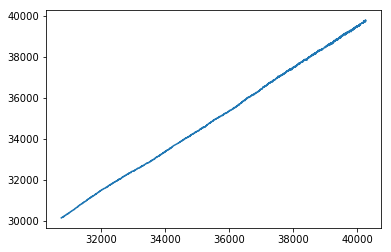

In [166]:
plt.plot(plate_temp,temp[11])

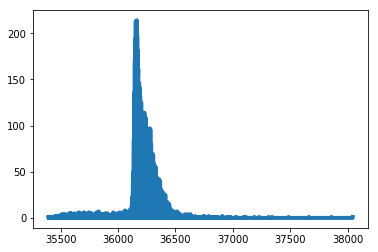

In [89]:
from skimage.exposure import histogram

hist, hist_centers = histogram(frames[2000])
plt.plot(hist_centers, hist, linewidth=4)